In [22]:
#decision tree for UCI adult income

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
#importing csv files
train=pd.read_csv("C:/Users/sarve/Downloads/ML record/adult.csv/adult.csv")

In [72]:
train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,1
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,1
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,0
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,1
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,1


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          46043 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         46033 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
country            47985 non-null object
income             48842 non-null int64
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [66]:
train.shape

(48842, 15)

In [68]:
#mapping values of income as greater than 50K to 1 and less than 50k to 0
salary_map={' <=50K':1,' >50K':0}
train['income']=train['income'].map(salary_map)

In [73]:
train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,1
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,1
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,0
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,1
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,1


In [74]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
occupation,2809,0.057512
workclass,2799,0.057307
country,857,0.017546
income,0,0.000000
hours-per-week,0,0.000000


In [37]:
#dealing with missing categorical Values

In [75]:
#function to find mode
def mis_cat(series):
    mode=series.value_counts().index[0]
    series=series.fillna(mode)
    return series

In [76]:
x=['workclass','occupation','country']
for x in train:
    train[x]=mis_cat(train[x])

In [77]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
income,0,0.0
country,0,0.0
hours-per-week,0,0.0
capital-loss,0,0.0
capital-gain,0,0.0


In [78]:
#understanding the data

Text(0.5, 1.05, 'Correlation of train data Features')

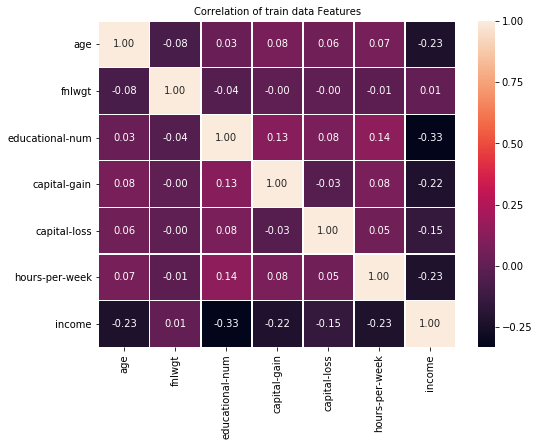

In [79]:
plt.figure(figsize = (8,6))
sns.heatmap(train.corr(),
            xticklabels=train.corr().columns.values,
            yticklabels=train.corr().columns.values,
            annot=True,fmt='.2f',linewidths=0.30,
             linecolor='white')
plt.title('Correlation of train data Features', y = 1.05, size=10)

In [80]:
grouped_by_sex_and_race = train.groupby(['race', 'gender'])
print(grouped_by_sex_and_race.filter(lambda x: train['race'].iloc[0] == 'Amer-Indian-Eskimo' and train['gender'].iloc[0] == 'Male')['age'].max())
grouped_by_sex_and_race['age'].describe()

nan


count       mean        std   min   25%   50%  \
race               gender                                                    
Amer-Indian-Eskimo Female    185.0  36.237838  12.840056  17.0  26.0  35.0   
                   Male      285.0  36.989474  11.703943  17.0  29.0  35.0   
Asian-Pac-Islander Female    517.0  35.657640  12.637799  17.0  25.0  34.0   
                   Male     1002.0  38.994012  12.824878  18.0  29.0  37.0   
Black              Female   2308.0  37.905979  12.736001  17.0  28.0  36.0   
                   Male     2377.0  37.922592  13.036981  17.0  28.0  36.0   
Other              Female    155.0  31.212903  11.233061  17.0  23.0  29.0   
                   Male      251.0  35.167331  11.808297  17.0  26.0  32.0   
White              Female  13027.0  36.882935  14.454178  17.0  25.0  35.0   
                   Male    28735.0  39.704507  13.475250  17.0  29.0  38.0   

                            75%   max  
race               gender              
Amer-Indian-Eskimo Female  46.0  80.0  
                   Male    44.0  82.0  
Asian-Pac-Islander Female  44.0  81.0  
                   Male    46.0  90.0  
Black              Female  46.0  90.0  
                   Male    46.0  90.0  
Other              Female  37.0  74.0  
                   Male    42.5  77.0  
White              Female  47.0  90.0  
                   Male    49.0  90.0

In [81]:
train[['relationship','income']].groupby(['relationship']).mean()

,income
relationship,
Husband,0.551329
Not-in-family,0.898593
Other-relative,0.965471
Own-child,0.985358
Unmarried,0.939707
Wife,0.531103


In [85]:
train[['workclass','income']].groupby(['workclass']).mean()

,income
workclass,
Federal-gov,0.608240
Local-gov,0.704401
Never-worked,1.000000
Private,0.791527
Self-emp-inc,0.446608
Self-emp-not-inc,0.721129
State-gov,0.732458
Without-pay,0.904762


In [ ]:
#Working with categorical features

In [87]:
train.select_dtypes(include=np.object)

,workclass,education,marital-status,occupation,relationship,race,gender,country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States
6,Private,HS-grad,Never-married,Prof-specialty,Unmarried,Black,Male,United-States
7,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
8,Private,Some-college,Never-married,Other-service,Unmarried,White,Female,United-States
9,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


In [88]:
import sklearn.preprocessing as pre

In [89]:
#using label encoder to Encode categorical features as a one-hot numeric array. 

In [90]:
col_ob=train.select_dtypes(include='object').columns

In [91]:
for x in col_ob:
    train[x]=pre.LabelEncoder().fit_transform(train[x])

In [92]:
train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,1
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,1
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,0
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,0
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,1
5,34,3,198693,0,6,4,7,1,4,1,0,0,30,38,1
6,29,3,227026,11,9,4,9,4,2,1,0,0,40,38,1
7,63,5,104626,14,15,2,9,0,4,1,3103,0,32,38,0
8,24,3,369667,15,10,4,7,4,4,0,0,0,40,38,1
9,55,3,104996,5,4,2,2,0,4,1,0,0,10,38,1


In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null int32
fnlwgt             48842 non-null int64
education          48842 non-null int32
educational-num    48842 non-null int64
marital-status     48842 non-null int32
occupation         48842 non-null int32
relationship       48842 non-null int32
race               48842 non-null int32
gender             48842 non-null int32
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
country            48842 non-null int32
income             48842 non-null int64
dtypes: int32(8), int64(7)
memory usage: 4.1 MB


In [86]:
#applying decision tree Model

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
X = train.drop('income',axis=1)
y = train['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [97]:
dtree = DecisionTreeClassifier()

In [98]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [99]:
predictions = dtree.predict(X_test)

In [101]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62      3420
           1       0.89      0.87      0.88     11233

   micro avg       0.82      0.82      0.82     14653
   macro avg       0.75      0.76      0.75     14653
weighted avg       0.82      0.82      0.82     14653



In [103]:
print(confusion_matrix(y_test,predictions))

[[2189 1231]
 [1414 9819]]


In [102]:
#Fitting Random forest model

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rfc = RandomForestClassifier(n_estimators=600)

In [106]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [107]:
predictions2 = rfc.predict(X_test)

In [110]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.74      0.64      0.68      3420
           1       0.89      0.93      0.91     11233

   micro avg       0.86      0.86      0.86     14653
   macro avg       0.82      0.78      0.80     14653
weighted avg       0.86      0.86      0.86     14653



In [111]:
print(confusion_matrix(y_test,predictions2))

[[ 2184  1236]
 [  783 10450]]


In [ ]:
#slightly better accuracy with random forest algorithm